In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np

In [2]:
os.chdir(os.path.join(os.path.sep, 'home', 'tkokkeng', 'Documents', 'comfort-study'))
os.getcwd()

'/home/tkokkeng/Documents/comfort-study'

In [3]:
import sys
if os.path.join(os.getcwd(), 'source') not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), 'source'))
sys.path

['/home/tkokkeng/Documents/comfort-study',
 '/home/tkokkeng/Documents/comfort-study/source',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python36.zip',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6/lib-dynload',
 '/usr/lib/python3.6',
 '',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6/site-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/tkokkeng/.ipython']

## Load data

In [4]:
all_data = pd.read_excel(io=os.path.join('data', 'data_transformed.xlsx'), sheet_name=None)

In [5]:
len(all_data)

9

In [6]:
all_data.keys()

odict_keys(['lower zone', 'lower + A', 'lower + B', 'lower + C', 'upper zone', 'upper + A', 'upper + B', 'upper + C', 'upper + D'])

In [9]:
survey_titles = all_data['lower zone'].columns.tolist()
survey_titles

['时间戳记',
 'Which Zone are you sitting in',
 'What is your gender?',
 'What is your clothing like?',
 'Do you feel you have adequate restsleep the previous night?',
 'Indoor environment perception [Temperature]',
 '[Air movement]',
 '[Air Quality]',
 'Indoor Environmental Satisfaction [Temperature]',
 'Indoor Environmental Satisfaction [Air movement]',
 'Indoor Environmental Satisfaction [Air quality]',
 'Indoor Environmental Satisfaction [Overall]',
 'How much do you experience the following [Headaches]',
 'How much do you experience the following [Difficulty in concentration]',
 'How much do you experience the following [Dry skin]',
 'How much do you experience the following [Sleepiness]',
 'How much do you experience the following [Eye irritation]',
 'How much do you experience the following [Throat irritation]',
 'How much do you experience the following [Running nose]',
 'How much do you experience the following [SneezingCoughing]']

In [10]:
del survey_titles[:12]
survey_titles

['How much do you experience the following [Headaches]',
 'How much do you experience the following [Difficulty in concentration]',
 'How much do you experience the following [Dry skin]',
 'How much do you experience the following [Sleepiness]',
 'How much do you experience the following [Eye irritation]',
 'How much do you experience the following [Throat irritation]',
 'How much do you experience the following [Running nose]',
 'How much do you experience the following [SneezingCoughing]']

In [11]:
zones = list(all_data.keys())
zones

['lower zone',
 'lower + A',
 'lower + B',
 'lower + C',
 'upper zone',
 'upper + A',
 'upper + B',
 'upper + C',
 'upper + D']

## Determine all classes for each survey

In [12]:
set(all_data['lower zone']['[Air movement]'].value_counts().index)

{'A little strong', 'A little weak', 'Just nice', 'None', 'Weak'}

In [13]:
'Just nice' in all_data['lower zone']['[Air movement]'].value_counts().index

True

In [70]:
class_dict = {}

# for title in survey_titles:
#     classes = set()
#     for zone in zones:
#         classes = classes.union(set(all_data[zone][title].value_counts().index))
#     class_dict[title] = classes

for title in survey_titles:
    classes = ['Not at all', 'A little', 'Moderate' , 'Intense']
    class_dict[title] = classes


In [71]:
class_dict.get(survey_titles[0])

['Not at all', 'A little', 'Moderate', 'Intense']

In [72]:
len(class_dict.get('How much do you experience the following [Headaches]'))

4

In [73]:
all_data['lower zone'][survey_titles[0]].value_counts()

Not at all    39
A little      14
Moderate       7
Name: How much do you experience the following [Headaches], dtype: int64

## Plot data

In [74]:
class_by_zone_cnt = np.zeros((len(class_dict.get(survey_titles[0])), len(zones)))
for zone_idx, zone in enumerate(zones):
    val_cnt = all_data[zone][survey_titles[0]].value_counts()
    for cls_idx, cls in enumerate(class_dict.get(survey_titles[0])):
        if cls in val_cnt.index:
            class_by_zone_cnt[cls_idx, zone_idx] = val_cnt[cls]

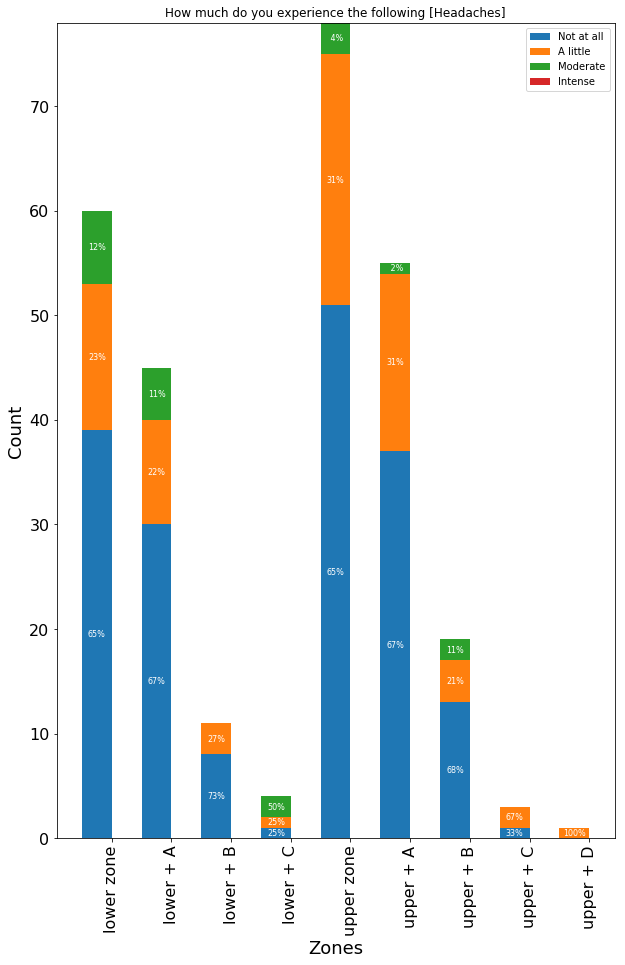

In [75]:
fig = plt.figure(figsize=(10, 15))

bar_width = 0.5
bar_l = np.arange(len(zones))
tick_pos = [i + (bar_width / 2) for i in bar_l]

classes = class_dict.get(survey_titles[0])
ax = []
ax.append(plt.bar(bar_l, class_by_zone_cnt[0], width=bar_width, label=classes[0]))
for cls_idx, cls in enumerate(classes[1:]):
    ax.append(plt.bar(bar_l, class_by_zone_cnt[cls_idx + 1], bottom=class_by_zone_cnt[:cls_idx + 1].sum(axis=0),
                      width=bar_width, label=cls))
# ax.append(plt.bar(bar_l, class_by_zone_cnt[0], width=bar_width, label=cls))
plt.ylabel("Count", fontsize=18)
plt.xlabel("Zones", fontsize=18)
plt.legend(loc="best")
plt.xticks(tick_pos, zones, fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.title(survey_titles[0])

for zone_idx, zone in enumerate(zip(*ax)):
    total_cnt = class_by_zone_cnt[:, zone_idx].sum()
    for cls_idx, cls in enumerate(zone):
        h = cls.get_height()
        if h > 0:
            plt.text(cls.get_x() + cls.get_width() / 2., cls.get_y() + h / 2.,
                     '{:2d}'.format(int(round(class_by_zone_cnt[:, zone_idx][cls_idx] * 100. / total_cnt))) + '%',
                     ha="center", va="center",
                     color="white", fontsize=8)  # , fontweight="bold")
plt.show()


In [17]:
# Reference code for stacked bar chart from https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

# A = [45, 17, 47]
# B = [91, 70, 72]
# 
# fig = plt.figure(facecolor="white")
# 
# ax = fig.add_subplot(1, 1, 1)
# bar_width = 0.5
# bar_l = np.arange(1, 4)
# tick_pos = [i + (bar_width / 2) for i in bar_l]
# 
# ax1 = ax.bar(bar_l, A, width=bar_width, label="A", color="green")
# ax2 = ax.bar(bar_l, B, bottom=A, width=bar_width, label="B", color="blue")
# ax.set_ylabel("Count", fontsize=18)
# ax.set_xlabel("Class", fontsize=18)
# ax.legend(loc="best")
# plt.xticks(tick_pos, ["C1", "C2", "C3"], fontsize=16)
# plt.yticks(fontsize=16)
# 
# for r1, r2 in zip(ax1, ax2):
#     h1 = r1.get_height()
#     h2 = r2.get_height()
#     plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#     plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
# 
# plt.show()

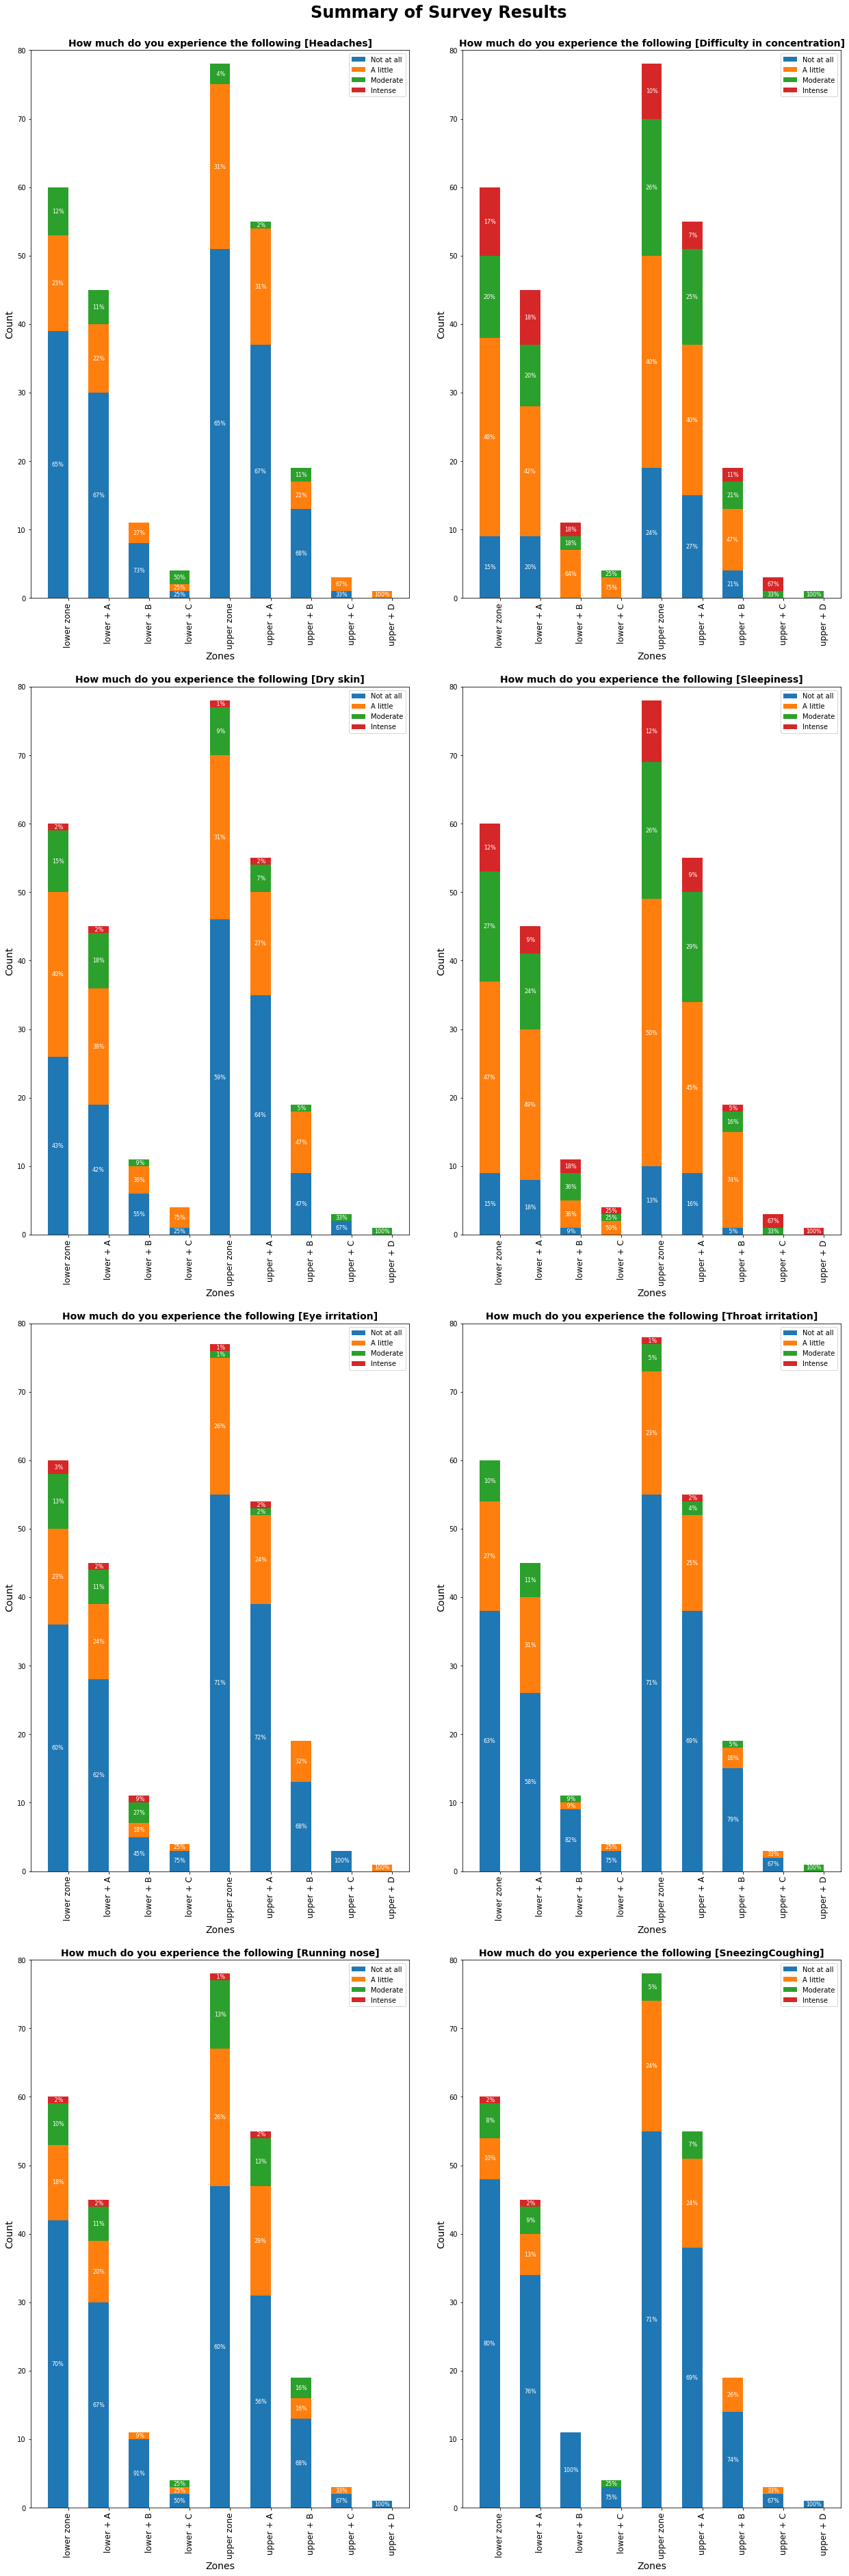

In [78]:
fig, ax = plt.subplots(nrows=int(np.ceil(len(survey_titles) / 2)), ncols=2, figsize=(18, 55))
fig.suptitle('Summary of Survey Results ', fontsize=24, fontweight='bold')
i = 0
done = False
bar_width = 0.5
bar_l = np.arange(len(zones))
tick_pos = [j + (bar_width / 2) for j in bar_l]

for row in ax:
    if not done:
        for col in row:

            class_by_zone_cnt = np.zeros((len(class_dict.get(survey_titles[i])), len(zones)))
            for zone_idx, zone in enumerate(zones):
                val_cnt = all_data[zone][survey_titles[i]].value_counts()
                for cls_idx, cls in enumerate(class_dict.get(survey_titles[i])):
                    if cls in val_cnt.index:
                        class_by_zone_cnt[cls_idx, zone_idx] = val_cnt[cls]
            classes = class_dict.get(survey_titles[i])
            ax = []

            ax.append(col.bar(bar_l, class_by_zone_cnt[0], width=bar_width, label=classes[0]))
            for cls_idx, cls in enumerate(classes[1:]):
                ax.append(col.bar(bar_l, class_by_zone_cnt[cls_idx + 1], bottom=class_by_zone_cnt[:cls_idx + 1].sum(axis=0),
                                  width=bar_width, label=cls))

            col.set_ylabel("Count", fontsize=14)
            col.set_xlabel("Zones", fontsize=14)
            col.legend(loc="best")
            col.set_xticks(tick_pos)
            col.set_xticklabels(zones, fontsize=12, rotation=90)
            col.set_ylim((0, 80))
            # col.set_yticks(col.get_yticks())
            # col.set_yticklabels(col.get_yticklabels(), fontsize=12)
            col.set_title(survey_titles[i], fontsize=14, fontweight='bold')

            for zone_idx, zone in enumerate(zip(*ax)):
                total_cnt = class_by_zone_cnt[:, zone_idx].sum()
                for cls_idx, cls in enumerate(zone):
                    h = cls.get_height()
                    if h > 0:
                        col.text(cls.get_x() + cls.get_width() / 2., cls.get_y() + h / 2.,
                                 '{:2d}'.format(int(round(class_by_zone_cnt[:, zone_idx][cls_idx] * 100. / total_cnt))) + '%',
                                 ha="center", va="center",
                                 color="white", fontsize=8)  # , fontweight="bold")

            if i < (len(survey_titles) - 1):
                i += 1
            else:
                done = True
                break

if ((i + 1) % 2) > 0:
    for j in range((i + 1) % 2, 2):
        ax[-1][j].axis('off')

plt.tight_layout(rect=[0, .03, 1, .97], pad=1.0, w_pad=2.0, h_pad=2.0)
plt.savefig(os.path.join('images', 'stacked-bar-chart'))
plt.show()
plt.close()